In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from CLHLS.get_3year_data import get_period_data
from CLHLS.process_data import process_wave_data
from CLHLS.get_total_df_for_ML import get_total_df
from CLHLS.baseline_models_LR_features import baseline_models
from CLHLS.get_current_diff_var import get_current_diff_variable_list

/Users/wangweiren/miniconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
Using TensorFlow backend.
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _n

In [2]:
first_wave_new,second_wave_new,third_wave_new,fourth_wave_new = get_period_data()

Reading data ...
Getting 3 year periods data ...
Number of investgated elders situations :  
               start year observations  survivor  death  missing
2002 to 2005                    16064      8175   5874     2015
2005 to 2008                    15638      7472   5228     2938
2008 to 2011                    16954      8418   5635     2894
2011 to 2014                     9765      6066   2878      820
Selecting needed variables ...


/Users/wangweiren/Tencent medical/CLHLS_CI_draft/CLHLS/get_3year_data.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wave_data[column] = pd.to_numeric(wave_data[column],errors = 'coerce')
/Users/wangweiren/Tencent medical/CLHLS_CI_draft/CLHLS/get_3year_data.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wave_data[column] = pd.to_numeric(wave_data[column],errors = 'coerce')
/Users/wangweiren/Tencent medical/CLHLS_CI_draft/CLHLS/get_3year_data.py:78: SettingWithCopyWarning: 
A value is trying to b

Filling missing values ...
Missing values situation
f34         0.29%
a43         0.24%
d71         0.10%
d72         0.13%
d81         0.12%
d82         0.20%
d91         0.15%
d92         0.21%
d31         0.02%
d32         0.07%
d11f        0.02%
e1          0.20%
e5          0.04%
e6          0.01%
g15a1       0.01%
g15b1       0.01%
g15c1       0.01%
g15d1       0.01%
g15e1       0.01%
g15f1       0.01%
g15g1       0.01%
g15h1       0.01%
g15i1       0.01%
g15j1       0.01%
g15k1       0.01%
g15l1       0.01%
g15m1       0.01%
g15n1       0.01%
g15o1       0.01%
f34_5       0.72%
a51_5       0.04%
d71_5       0.04%
d72_5       0.13%
d81_5       0.05%
d82_5       0.20%
d92_5       0.21%
d11b_5      0.01%
d11g_5      0.01%
d11h_5      0.01%
e1_5        0.01%
e2_5        0.02%
e3_5        0.01%
e4_5        0.01%
e5_5        0.04%
e6_5        0.02%
g15a1_5     0.01%
g15d1_5     0.01%
g15g1_5     0.01%
g15h1_5     0.05%
g15i1_5     0.09%
g15j1_5    54.23%
g15k1_5     0.11%
g15l1_5     

In [3]:
wave1,wave2,wave3,wave4 = process_wave_data(first_wave_new,second_wave_new,third_wave_new,fourth_wave_new)

Before drop Depression missing :  7271
After drop Depression missing :  6368
Before drop Depression missing :  6592
After drop Depression missing :  5898
Before drop Depression missing :  7337
After drop Depression missing :  6354
Before drop Depression missing :  5408
After drop Depression missing :  4639
Processing invariant variables ...
Done!
Processing invariant variables ...
Done!
Processing invariant variables ...
Done!
Processing invariant variables ...
Done!
Processing variant variables ...
Before drop Dementia :  6368
After drop Dementia :  6278
Done!
Processing variant variables ...
Before drop Dementia :  5898
After drop Dementia :  5830
Done!
Processing variant variables ...
Before drop Dementia :  6354
After drop Dementia :  6248
Done!
Processing variant variables ...
Before drop Dementia :  4639
After drop Dementia :  4564
Done!


## 合并数据集

In [4]:
total_df = get_total_df(wave1,wave2,wave3,wave4)

6278 5830 6248 4564
22920


In [5]:
len(total_df)

22920

## 计算三年间diff变量，获取各组变量包含的变量名

In [6]:
current_variables,diff_var = get_current_diff_variable_list(total_df)

Creating diff variables based on current variables and 3 years later variables ...
Done!


## 预测模型——所有数据

In [7]:
for var in ['eat_fruits','eat_vegs','outdoor_activity','plant_flower_bird','read_news_books','raise_domestic_animals','majong_or_cards','tv_or_radio']:
    current_variables.remove(var)
    
current_variables.append('current_CI_score')
current_variables.remove('nation_group')

#### 三年前变量预测三年后CI

    get average and 95% bootstrap CI of metrics

In [ ]:
random_rs = list(np.random.randint(1,99,9))
random_rs.append(67)
performances = []
for i in range(1,11):
    model = baseline_models(total_df,current_variables,'later_CI',random_state=i)
    performances.append(model.get_performance())

Selecting features ... 
Selecting features ... Done!
Tuning parameters for lightgbm ...
Tuning parameters for lightgbm ... Done!
Best parameters for Lightgbm : 
{'max_depth': [3], 'num_leaves': [5], 'min_data_in_leaf': [400], 'bagging_fraction': [1], 'bagging_freq': [2], 'feature_fraction': [0.7], 'reg_alpha': [0.7], 'reg_lambda': [0.1]}
[0.82106821 0.81262718 0.82251264]
Tuning parameters for LogisticRegression ...
Tuning parameters for LogisticRegression ... Done!
Best parameters for LogisticRegression : 
{'penalty': ['l1'], 'C': [233.57214690901213]}
Tuning parameters for SVM ...
Tuning parameters for SVM ... Done!
Best parameters for SVM : 
{'C': [100], 'gamma': [0.0001]}
Tuning parameters for RandomForest ... 


/Users/wangweiren/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_valida

Tuning parameters for RandomForest ... Done!
Best parameters for RandomForest : 
{'max_depth': [5], 'max_features': [5], 'min_samples_leaf': [43], 'min_samples_split': [2], 'criterion': ['entropy']}
Selecting features for MLP ... Done!
Tuning parameters for MLP ... 
Tuning parameters for MLP ... Done!
Best parameters for MLP : 
{'hidden_layer_sizes': [256], 'learning_rate_init': [0.0005], 'alpha': [1e-05]}
Tuning parameters for XGBoost ... 
Tuning parameters for XGBoost ... Done!
Best parameters for XGBoost : 
{'max_depth': [3], 'min_child_weight': [3], 'subsample': [0.7], 'colsample_bytree': [0.6], 'gamma': [0.1], 'reg_alpha': [3], 'reg_lambda': [3], 'learning_rate': [0.05]}
Selecting features ... 
Selecting features ... Done!
Tuning parameters for lightgbm ...
Tuning parameters for lightgbm ... Done!
Best parameters for Lightgbm : 
{'max_depth': [3], 'num_leaves': [5], 'min_data_in_leaf': [20], 'bagging_fraction': [0.9], 'bagging_freq': [5], 'feature_fraction': [0.6], 'reg_alpha': [0

In [ ]:
total_perform = pd.concat([performances[0],performances[1],performances[2],performances[3],performances[4],performances[5],performances[6],performances[7],
          performances[8],performances[9]],axis = 0)
max_metrics = total_perform[['Model','test_accuracy', 'test_AUC', 'test_precision',
       'test_recall', 'test_F1score', 'test_specificity', 'test_brier_loss','NPV_test']].groupby('Model').max()
min_metrics = total_perform[['Model','test_accuracy', 'test_AUC', 'test_precision',
       'test_recall', 'test_F1score', 'test_specificity', 'test_brier_loss','NPV_test']].groupby('Model').min()
avg_metrics = total_perform[['Model','test_accuracy', 'test_AUC', 'test_precision',
       'test_recall', 'test_F1score', 'test_specificity', 'test_brier_loss','NPV_test']].groupby('Model').mean()
minus = avg_metrics - min_metrics
plus = max_metrics - avg_metrics
res = avg_metrics.copy()

for i in range(res.shape[0]):
    for j in range(res.shape[1]):
        res.iloc[i,j] = '%.3f' %avg_metrics.iloc[i,j] + '(' + '+' + '%.3f' %plus.iloc[i,j] + ',' + '-' + '%.3f' % minus.iloc[i,j] + ')'

In [ ]:
res

    get best performance

In [8]:
models1 = baseline_models(total_df,current_variables,'later_CI')

Selecting features ... 
Selecting features ... Done!
Tuning parameters for lightgbm ...
Tuning parameters for lightgbm ... Done!
Best parameters for Lightgbm : 
{'max_depth': [3], 'num_leaves': [5], 'min_data_in_leaf': [200], 'bagging_fraction': [1], 'bagging_freq': [2], 'feature_fraction': [0.7], 'reg_alpha': [0.001], 'reg_lambda': [1e-05]}
[0.815792   0.80936246 0.82493778]
Tuning parameters for LogisticRegression ...
Tuning parameters for LogisticRegression ... Done!
Best parameters for LogisticRegression : 
{'penalty': ['l1'], 'C': [6.1584821106602545]}
Tuning parameters for SVM ...
Tuning parameters for SVM ... Done!
Best parameters for SVM : 
{'C': [100], 'gamma': [0.0001]}
Tuning parameters for RandomForest ... 


/Users/wangweiren/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_valida

Tuning parameters for RandomForest ... Done!
Best parameters for RandomForest : 
{'max_depth': [5], 'max_features': [5], 'min_samples_leaf': [51], 'min_samples_split': [2], 'criterion': ['entropy']}
Selecting features for MLP ... Done!
Tuning parameters for MLP ... 
Tuning parameters for MLP ... Done!
Best parameters for MLP : 
{'hidden_layer_sizes': [32], 'learning_rate_init': [0.0001], 'alpha': [1e-06]}
Tuning parameters for XGBoost ... 
Tuning parameters for XGBoost ... Done!
Best parameters for XGBoost : 
{'max_depth': [3], 'min_child_weight': [6], 'subsample': [0.8], 'colsample_bytree': [0.8], 'gamma': [0.1], 'reg_alpha': [2], 'reg_lambda': [3], 'learning_rate': [0.07]}


In [9]:
models1.get_performance()

,Model,CV_accuracy,CV_AUC,CV_precision,CV_recall,CV_F1score,CV_specificity,train_accuracy,train_AUC,train_precision,...,train_specificity,train_brier_loss,test_accuracy,test_AUC,test_precision,test_recall,test_F1score,test_specificity,test_brier_loss,NPV_test
0,lightgbm,0.713923,0.816697,0.198066,0.771751,0.315228,0.718391,0.721933,0.826507,0.203288,...,0.717072,0.177605,0.723956,0.821653,0.210397,0.763744,0.329910,0.720070,0.179328,0.968951
1,LR,0.745246,0.817938,0.211069,0.725959,0.326956,0.747245,0.743618,0.819514,0.210364,...,0.745052,0.175385,0.749339,0.822392,0.223178,0.732541,0.342124,0.750980,0.175985,0.966387
2,SVM,0.728771,0.817754,0.203835,0.750385,0.320540,0.725165,0.727077,0.819503,0.203296,...,0.724619,0.067765,0.734400,0.824292,0.217189,0.762259,0.338056,0.731679,0.069900,0.969243
3,RF,0.722389,0.816618,0.198568,0.742738,0.313288,0.722287,0.732222,0.825928,0.207393,...,0.729816,0.175731,0.737441,0.822893,0.219324,0.762259,0.340637,0.735017,0.176933,0.969378
4,NN,0.730910,0.816872,0.733058,0.726714,0.729559,0.741929,0.735496,0.821088,0.737857,...,0.740458,0.172934,0.746430,0.820643,0.222470,0.741456,0.342250,0.746916,0.175786,0.967299
0,XGBoost,0.719328,0.816073,0.201087,0.770221,0.318886,0.719111,0.727468,0.828328,0.205973,...,0.723622,0.174735,0.729773,0.822086,0.214256,0.763744,0.334635,0.726455,0.176590,0.969216


    get permutation importance

,variable,importance,rank
0,agegroup,0.029572,1
1,current_CI_score,0.002086,2
2,ADL,0.000637,3
3,std_majong_or_cards,-0.000973,4
4,std_tv_or_radio,-0.001230,5
5,gender,-0.002365,6
6,std_plant_flower_bird,-0.003770,7
7,std_read_news_books,-0.006182,8
8,education,-0.011466,9


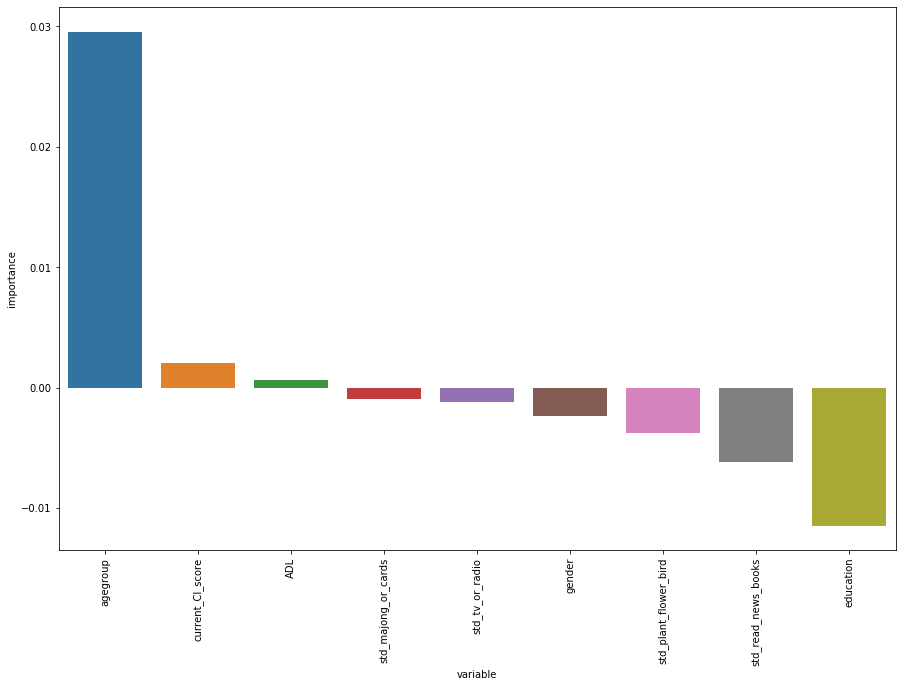

In [22]:
tmp1 = models1.get_importance('MLP').sort_values(by = 'importance',ascending = False)
tmp1.reset_index(drop = True,inplace =True)
tmp1['rank'] = tmp1.index+1
tmp1

,variable,importance
3,agegroup,0.026222
8,current_CI_score,0.000332
1,ADL,-0.000135
6,std_majong_or_cards,-0.000554
0,gender,-0.001278
7,std_tv_or_radio,-0.001675
4,std_plant_flower_bird,-0.003743
5,std_read_news_books,-0.005846
2,education,-0.008486


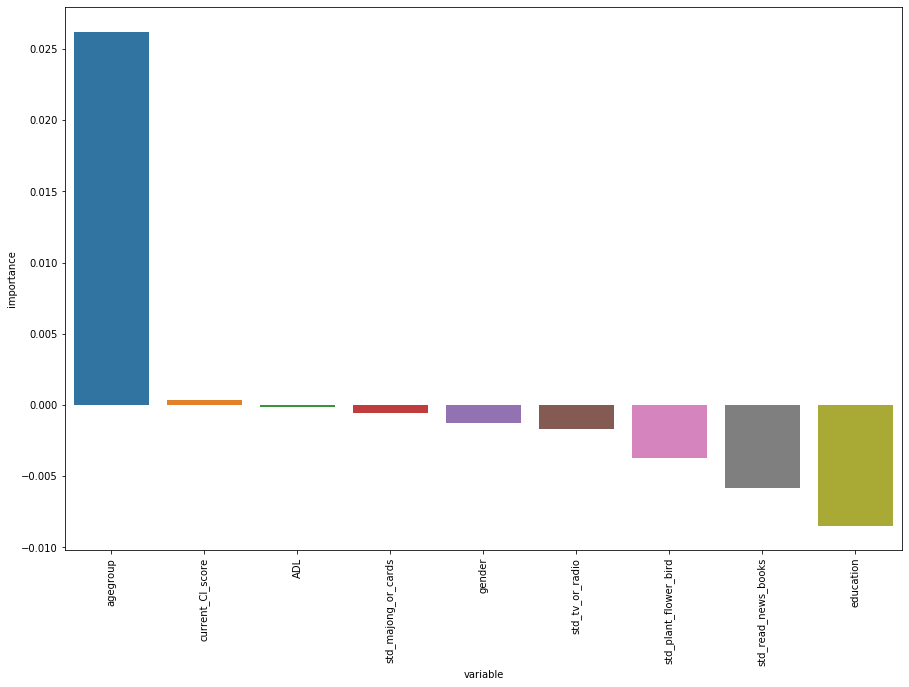

In [14]:
models1.get_importance('LR').sort_values(by = 'importance',ascending = False)

In [ ]:
X_df = models1.X.copy()
X_df.columns = ['gender',
 'ADL',
 'education',
 'agegroup',
 'garden works',
 'read news or books',
 'play majong or cards',
 'watch tv or listen radio',
 'baseline CI score']

In [ ]:
sns.heatmap(X_df.corr(),cmap = 'GnBu')